In [1]:
import sys 
import os 
import glob
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
import fnmatch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec  # for unequal plot boxes
import scipy.optimize
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
import scipy
import scipy.stats
import matplotlib.ticker as ticker
import math
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from pylab import *
from matplotlib.ticker import NullFormatter, MultipleLocator, FormatStrFormatter, FuncFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
#from gridData import Grid 
from io import StringIO
from collections import Counter
from scipy import stats
from scipy.stats import norm
from  scipy.stats import gaussian_kde
#from sklearn.neighbors import KernelDensity
#import statsmodels.api as sm
#from statsmodels.graphics.tsaplots import plot_acf
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from pylab import *
from matplotlib.ticker import NullFormatter
from matplotlib import font_manager


##Figure fonts and other params ##
hfont = {'fontname':'Helvetica'}
mpl.rcParams['figure.dpi'] =300
mpl.rcParams.update({'font.size': 16})
mpl.rcParams['pdf.fonttype'] = 42 

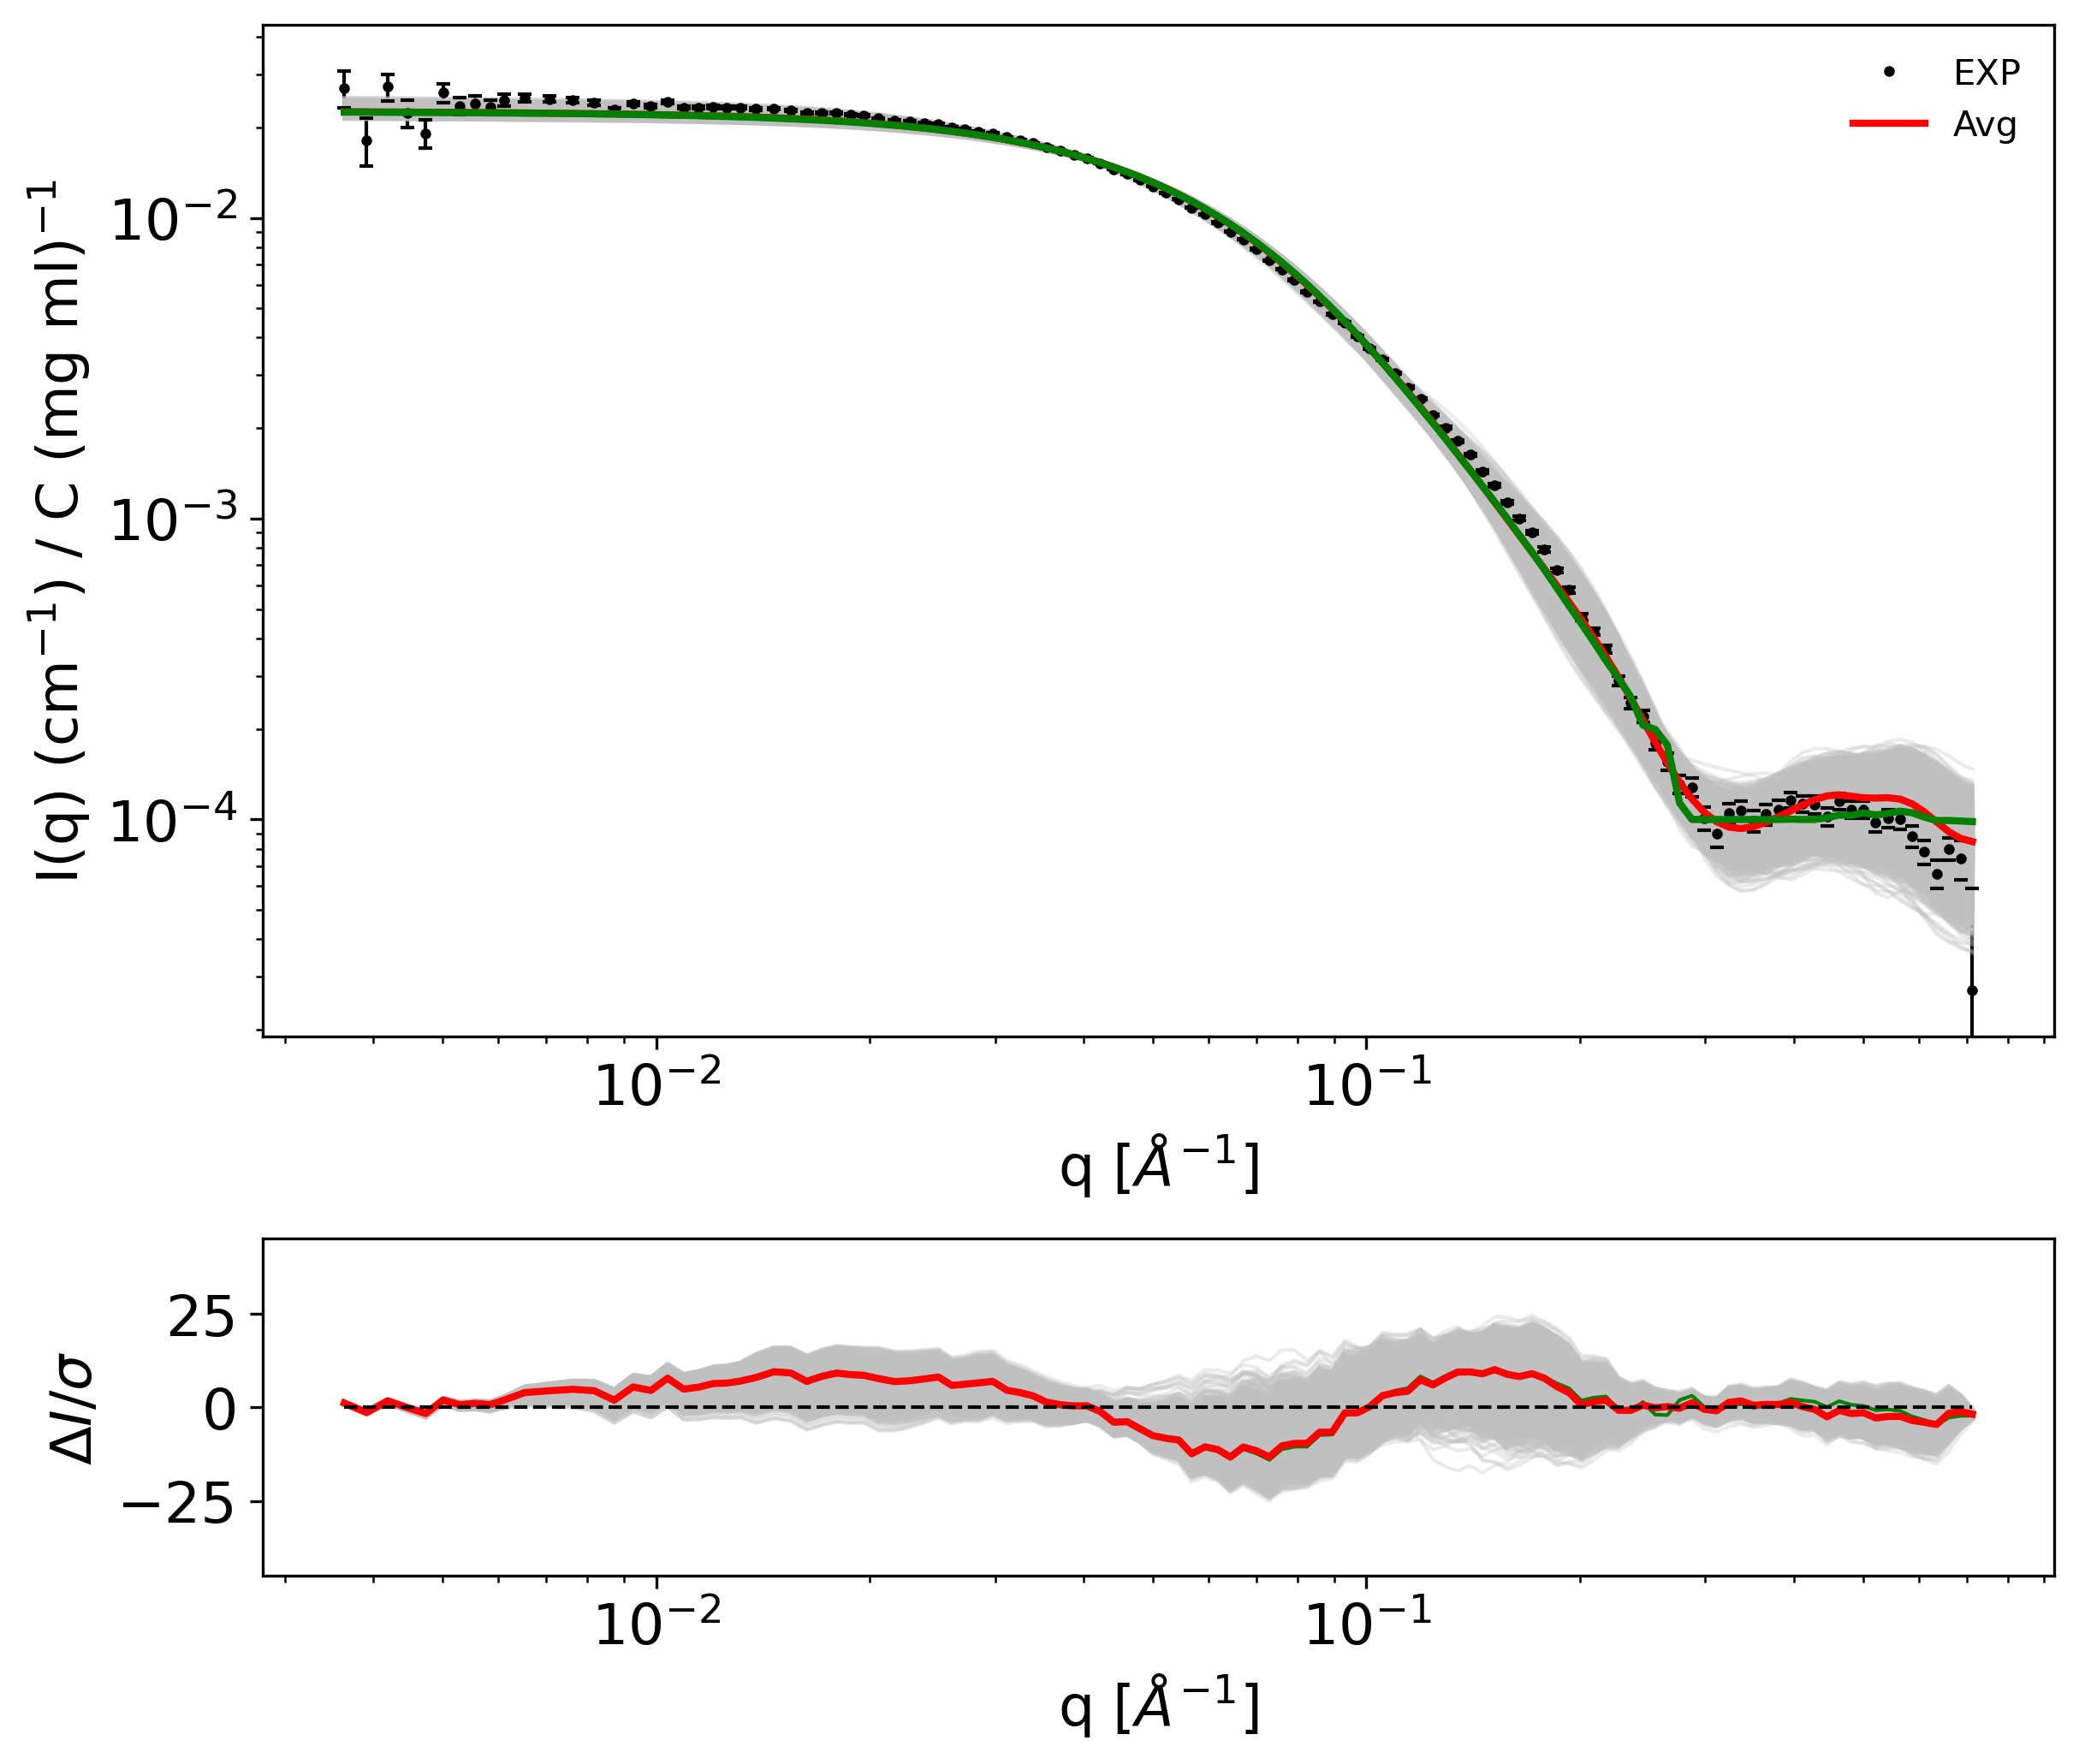

In [2]:
fig, (ax2, ax3) = plt.subplots( nrows = 2, sharex = True, gridspec_kw = {"height_ratios" : [3,1], "hspace" : 0.3},figsize=(9, 8))
fits1 = []

#Fits
dirs1 = sorted(glob.glob('/home/raul/projects/GHR_FL/GHR_ECDfl/pepsi_fits_5000_3p45_q0d75_dro7d4/3p45_GHR_ECDfl_m02_*.dat'))
#print(dirs1)
for num1, file in enumerate(dirs1):

    fits1.append(np.genfromtxt(file, skip_header=6)) ;# skip_footer=10 

#num_curves1 = len(fits1)

#colors1 = [cm.rainbow(k/float(num_curves1),1) for k in range(num_curves1)]
#colors1 = [cm.hsv(k/float(num_curves1),1) for k in range(num_curves1)]

mean = []
for num1, fit in enumerate(fits1):
    #if num == 0:
    #ax2.loglog(fit[:,0],fit[:,1],c=colors1[num1], alpha=0.3, linewidth=1)
    ax2.loglog(fit[:,0],fit[:,3],c='silver', alpha=0.3, linewidth=1)
    mean.append(fit[:,3])
#Exp_front

mean = np.array(mean).mean(axis=0)
sts = np.genfromtxt("/home/raul/projects/GHR_FL/GHR_ECDfl/SAXSdata/ECD_3p45mgmL_subtracted_rebinned_divide_conc.dat", skip_header=1);

sts2 = np.genfromtxt('/home/raul/projects/GHR_FL/GHR_ECDfl/pepsi_fits_5000_3p45_q0d75_dro7d4/3p45_GHR_ECDfl_m02_4628.pdb_q075avp.dat', skip_header=6);#skip_footer=10
sts3 = np.genfromtxt("/home/raul/projects/GHR_FL/GHR_ECDfl/pepsi_fits_5000_3p45_q0d75_dro7d4/example2_3_.stats.dat");

ax2.loglog( sts[:,0],sts[:,1], 'o',alpha=1, c='black',markersize = 2, label = 'EXP')
ax2.errorbar (sts[:,0],sts[:,1],yerr=sts[:,2],alpha=1,capsize=2, elinewidth=1, markeredgewidth=1, c='black', lw=1, ls='none')
ax2.loglog(fits1[0][:,0],mean,c='red', alpha=1, linewidth=2, zorder=3, label = 'Avg')

#Models
ax2.loglog( sts3[:,0],sts3[:,3],c='green', linewidth = 2, zorder = 4)

#Reweigthed
#ax2.loglog( sts3[:,0],sts3[:,4],c=c3,linewidth = 1.5, zorder = 5)



ax2.set_xlabel( r'q [$\AA^{-1}$]' )
ax2.set_ylabel( r'I(q) (cm$^{-1}$) / C (mg ml)$^{-1}$')
ax2.legend( loc = 1, frameon = False, prop={'size': 10})
ax2.xaxis.set_tick_params(which='both', labelbottom=True)
#ax2.tick_params(axis='both', labelsize=14)
#plt.tight_layout()

#residuals plot 
ax3.hlines( 0, min(sts[:,0]), max(sts[:,0]), linestyle = '--', color = 'black', linewidth = 1, zorder=4 )
for num1, fit in enumerate(fits1):
   # ax3.plot( fit[:,0], (sts2[:,1] - fit[:,1] ) / sts2[:,2], c=colors1[num1],alpha=0.3, linewidth=1 )
     ax3.plot( fit[:,0], (sts2[:,1] - fit[:,3] ) / sts2[:,2], c='silver',alpha=0.3, linewidth=1 )

#ax3.plot(fits1[0][:,0],(sts2[:,1] - mean ) / sts2[:,2],c='green', alpha=1, linestyle = '--', linewidth=2)
ax3.plot(fits1[0][:,0],(sts2[:,1] - mean ) / sts2[:,2],c='red', alpha=1, linewidth=2, zorder=3)
ax3.plot( sts3[:,0], ( sts3[:,1] - sts3[:,3] ) / sts3[:,2], c='green', linewidth = 1, label = 'Models' )
ax3.set_ylim((-45,45))
ax3.set_ylabel( r'$\Delta I/\sigma$' )
ax3.set_xlabel( r'q [$\AA^{-1}$]' )
#ax3.tick_params(axis='both', labelsize=14)

#np.savetxt('/home/raul/projects/GHR_ensemble_fit/WIF_fig5_res_based/GHRfl_GFP_ensemble_fit_WIFresbased_fixedparamsF6_newparamsAB_270420/GHRfl_GFP_exp_ensemble_model_newparamsAB_270420.dat',(sts[:,0],sts[:,1],sts[:,2],mean,sagrc[:,1]), delimiter = ' ',fmt='%s')

#plt.savefig('/home/raul/projects/GHR_ensemble_fit/WIF_fig5_res_based/GHRfl_GFP_ensemble_fit_WIFresbased_fixedparamsF6_newparamsAB_270420/GHRfl_GFP_ensemble_fit_WIFresbased_fixedparamsF6_newparamsAB_270420.pdf', format = 'pdf')
plt.show()

In [3]:
## Estimation of Chi2 ##
## From MD --> no free params ##
## for SGRC model --> 6 free params ##

#sts = np.genfromtxt("/home/raul/projects/GHR_ICD_metaD_fits/SAXSdata/ICD_1p14mgml_subtracted_rebinned_divide_conc.dat", skip_header=1, skip_footer=10)
chisq1=np.sum( ((sts[:,1]-mean)/sts[:,2])**2 )
chisq2=np.sum( ((sts[:,1]-sts3[:,3])/sts[:,2])**2 )
print (chisq1)

chisq1r= chisq1/(118)
chisq2r= chisq2/(118)

print (chisq1r)
print (chisq2r)

4108.355683847765
34.816573591930215
37.479115790542004


### Process SAXS-fits for BME

In [26]:

import re
import natsort 
fits2 = []

#Fits

fits1=[]
files1 = glob.glob('/home/raul/projects/GHR_FL/GHR_ECDfl/pepsi_fits_5000_3p45_q0d75_dro7d4/3p45_GHR_ECDfl_m02_*.dat')
files1_sorted=natsort.natsorted(files1,reverse=False)

for num1, file1 in enumerate(files1_sorted):

    fits1.append(np.genfromtxt(file1, usecols=3,skip_footer=1)) ;# skip_footer=10 
array1=np.array(fits1)
#print (array)
sim_data_transp = np.transpose(array1)
print (sim_data_transp[0,:])

#print (array1[:,0])

np.savetxt('/home/raul/projects/GHR_FL/GHR_ECDfl/pepsi_fits_5000_3p45_q0d75_dro7d4/sim_raw_q07nt.dat',array1, delimiter = ' ',fmt='%s')


     #data = np.array([[float(x) for x in line.split()[1:]] for line in open(filename) if("#" not in line)])
data = np.array([[float(x) for x in line.split()[0:]] for line in open('/home/raul/projects/GHR_FL/GHR_ECDfl/pepsi_fits_5000_3p45_q0d75_dro7d4/sim_raw_q07nt.dat') if("#" not in line)])

print (data.shape)
    





[0.022881   0.02362774 0.02207033 ... 0.02215522 0.02184318 0.0228359 ]
(5000, 117)


# Warning: expt average             0.003638=2.6975e-02 is larger than maximum value in simulation 2.5106e-02
# Warning: expt average             0.003913=1.8139e-02 is smaller than minimum value in simulation 2.1285e-02
# Warning: expt average             0.004188=2.7272e-02 is larger than maximum value in simulation 2.5044e-02
# Warning: expt average             0.004739=1.9102e-02 is smaller than minimum value in simulation 2.1236e-02
# Warning: expt average             0.005014=2.6043e-02 is larger than maximum value in simulation 2.4951e-02
# Warning: expt average             0.006528=2.5083e-02 is larger than maximum value in simulation 2.4776e-02
# Warning: expt average             0.007078=2.4858e-02 is larger than maximum value in simulation 2.4711e-02
# Warning: expt average             0.007629=2.4648e-02 is larger than maximum value in simulation 2.4643e-02
# Warning: expt average             0.010381=2.4295e-02 is larger than maximum value in simulation 2.4280e-02
# theta:

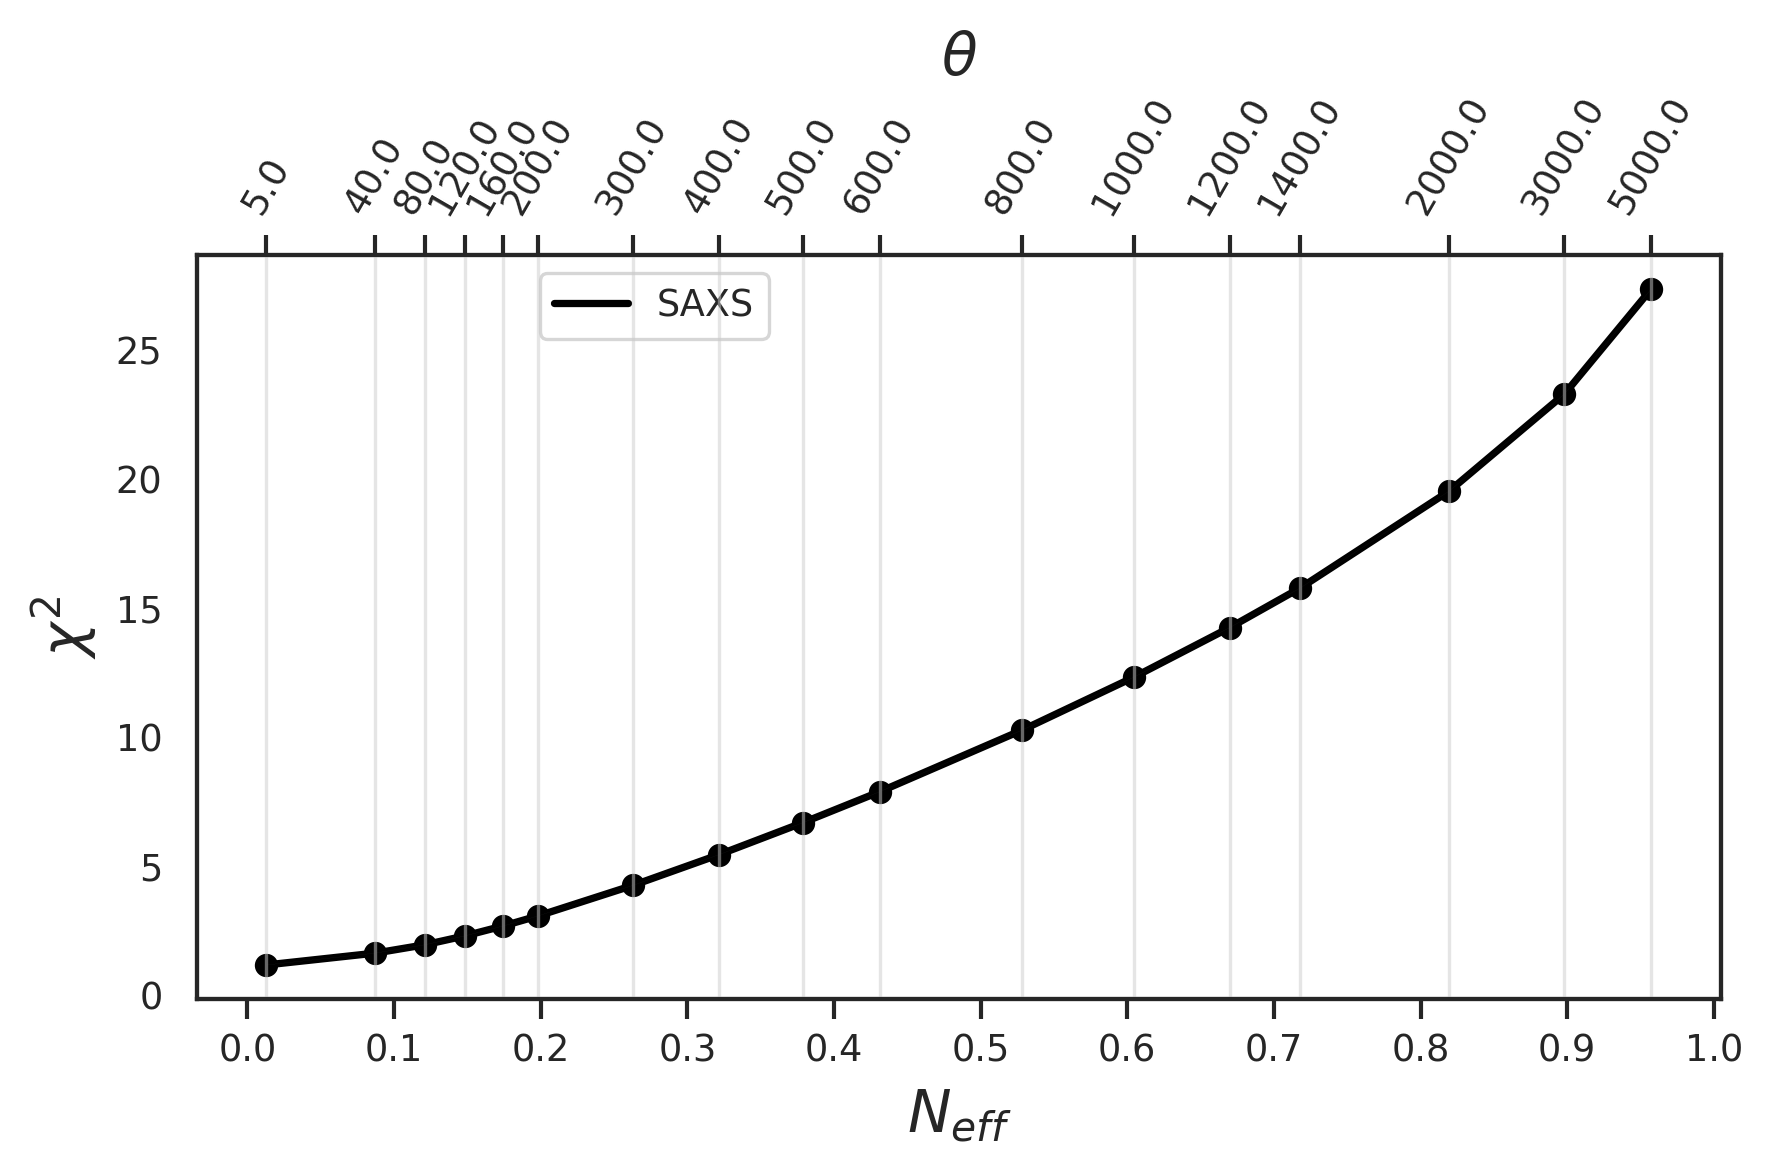

# theta: 300
# CHI2_re before minimization:      35.0867
# CHI2_re after minimization:        4.2558
# Fraction of effective frames:      0.2629


In [27]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec  # for unequal plot boxes
import scipy.optimize
bme_path = os.getcwd()[:-8]
# here append the path to the bme script
sys.path.append('/home/raul/bin/BME-master')
import bme_reweight as bme
import numpy as np
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
mpl.rcParams.update({'font.size': 14})
import matplotlib.ticker as ticker
from pylab import *
from matplotlib.ticker import NullFormatter

c1 = sns.xkcd_rgb["black"]
c2 = sns.xkcd_rgb["pale red"]
c3 = sns.xkcd_rgb["blue"]
c4 = sns.xkcd_rgb["apple"]
c5 = sns.xkcd_rgb["grey teal"]
c6 = sns.xkcd_rgb["orange"]

###### BME reweighting

### define name and read experimental and calculated data.
Rg = np.loadtxt('/home/raul/projects/GHR_FL/GHR_ECDfl/Rg/GHR_ECDfl_m02_Rg_5000.dat')
#print(Rg)
RgExp =29
RgExpe =0.09

exp_saxs = '/home/raul/projects/GHR_FL/GHR_ECDfl/pepsi_fits_5000_3p45_q0d75_dro7d4/EXP.dat'
calc_saxs = '/home/raul/projects/GHR_FL/GHR_ECDfl/pepsi_fits_5000_3p45_q0d75_dro7d4/sim_raw_q07nt.dat'

### initialize reweighting class
rew = bme.Reweight()

### load SAXS data
rew.load(exp_saxs,calc_saxs)

### do minimization for different values of theta
thetas= [5.,40.,80.,120.,160.,200.,300.,400.,500.,600.,800.,1000.,1200.,1400.,2000.,3000.,5000.]
#thetas= [1]
results = []
for t in thetas:
    # do the minimization
    chi2_saxs_before,chi2_saxs_after, srel = rew.optimize(theta=t)

    # calculate agreement with SAXS

    chi2_saxs_before,chi2_saxs_after = rew.weight_exp(exp_saxs,calc_saxs,"tmp1")
    results.append([np.exp(srel),chi2_saxs_before,chi2_saxs_after])


### Plot figure for different values of theta vs Neff and chi^2
sns.set_style("white")
sns.set_context("paper")
#sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300
# handling tickers and read data
mpl.rcParams['figure.dpi'] =300
results = np.array(results)

# define the figure
fig, ax1 = plt.subplots(figsize=(6, 4))

# plot SAXS and Rh
ax1.plot(results[:,0],results[:,2],label="SAXS",c='k',ls="-",lw=1.75)

# set tickers
ax1.set_xticks([0,0.1,0.2,0.3,0.4,0.5,.6,0.7,0.8,0.9,1.0])
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter("%3.1f"))
ax1.xaxis.set_minor_formatter(ticker.NullFormatter())

# Make a new horizontal axis to show the theta values and a new vertical axis to show the chi^2 total
ax2 = ax1.twiny()
ax2.plot(results[:,0],results[:,2],c='grey',lw=0.01)

#draw ticks at selected theta
sele = [5,40,80,120,160,200,300,400,500,600,800,1000,1200,1400,2000,3000,5000]
iis = [thetas.index(s) for s in  sele]
ax2.set_xticks(results[iis,0])
ax2.set_xticklabels(["%.1f"% s for s in sele],rotation=60)
ax1.scatter(results[iis,0],results[iis,2],c='k')

ax1.set_xlabel("$N_{eff}$",fontsize=14)
ax2.set_xlabel(r"$\theta$",fontsize=14)
ax1.set_ylabel(r"$\chi^2$",fontsize=14)
plt.grid(alpha=0.5)
ax1.legend(loc='upper center',bbox_to_anchor=(0.3, 0.5, 0.0, 0.5))
#ax3.legend(loc='upper center',bbox_to_anchor=(0.5, 0.5, 0.6, 0.5))
plt.tight_layout()
#plt.savefig('Theta_Neff_3p45_q75avp_5000m.pdf', format = 'pdf')
plt.show()

# select theta=300
chi2_before,chi2_after, srel = rew.optimize(theta=300)

print("# CHI2_re before minimization:     {:8.4f}".format(chi2_before))
print("# CHI2_re after minimization:      {:8.4f}".format(chi2_after))
print("# Fraction of effective frames:    {:8.4f}".format(np.exp(srel)))

In [1]:
##### Block averaging and plot figure

### Set bins for block average and optimal theta to use
### Set bins for block average and optimal theta to use
n_frames = len(Rg)
n_bins =5
bin_size = n_frames//n_bins
bins = np.arange(0,n_frames+bin_size,bin_size)
theta=300

#print("n_frames {:8.4f}".format(n_frames))
#print("bin_size {:8.4f}".format(bin_size))

### split in 10 blocks
for j in range(len(bins)-1):

    rows = np.arange(bins[j],bins[j+1])
    rew = bme.Reweight()
    rew.load(exp_saxs,calc_saxs,rows=rows)
    #rew.load(exp_rh,calc_rh,rows=rows)
    rew.optimize(theta=theta)

    rew.weight_exp(exp_saxs,calc_saxs,'/home/raul/projects/GHR_FL/GHR_ECDfl/pepsi_fits_5000_3p45_q0d75_dro7d4/example2b1_{}_'.format(j),rows=rows)

    w_opt = rew.get_weights()

    ### write weights to file
    w0 = [1./len(w_opt)]*len(w_opt)
    string = "".join(["{:10.4e} {:10.4e}\n".format(w0[k],
                            w_opt[k])for k in range(len(w_opt))])
    fh = open("/home/raul/projects/GHR_FL/GHR_ECDfl/pepsi_fits_5000_3p45_q0d75_dro7d4/example2b1_{}_weights.dat" .format(j),"w")
    fh.write(string)
    fh.close()

NameError: name 'Rg' is not defined

/home/raul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/raul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:224: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/raul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/raul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:224: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


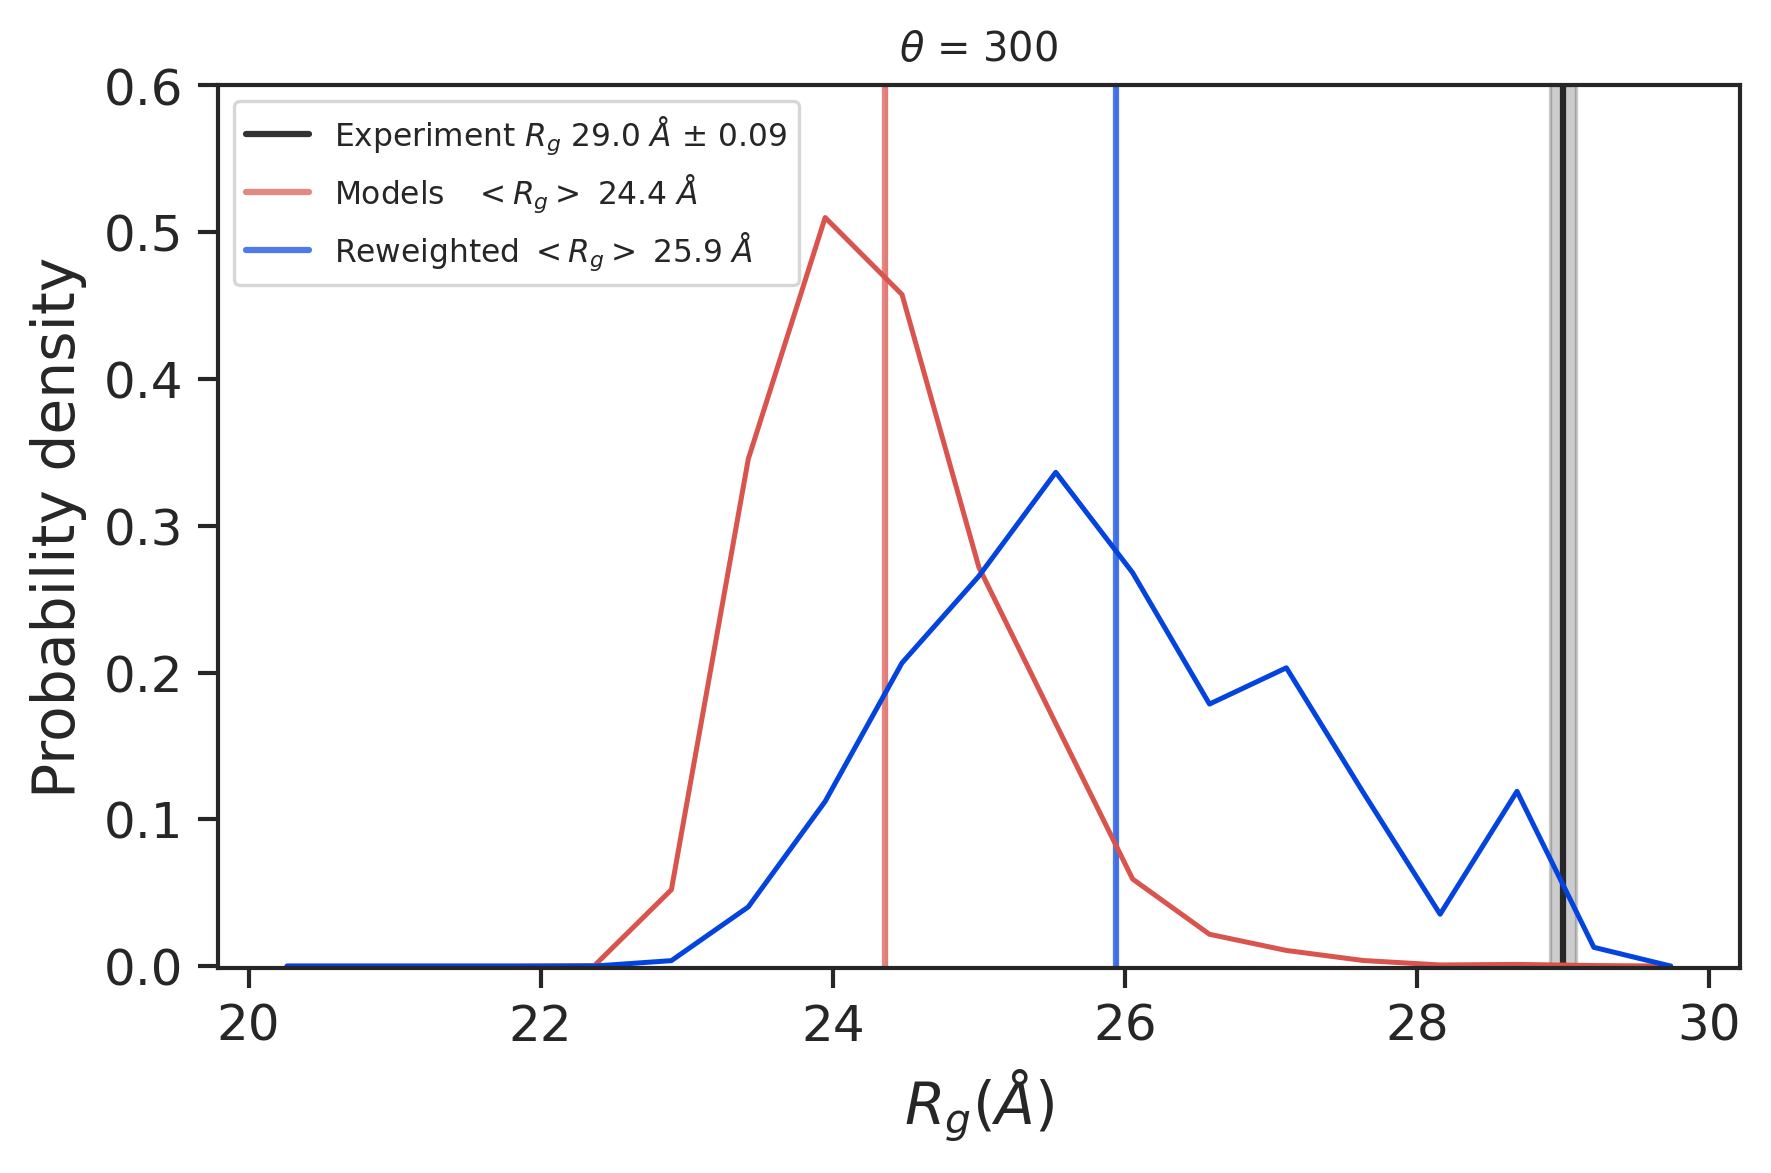

In [29]:
## PLOT Rg histograms ##
data =Rg

sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.set_ylabel("Probability density",fontsize=14)
ax.set_xlabel("$R_g (\AA$)",fontsize=14)
ax.tick_params(axis='both', labelsize=12)
#ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%3.1f"))
#ax.xaxis.set_minor_formatter(ticker.NullFormatter())

#starty, end = ax.get_ylim()
#startx, end = ax.get_ylim()
#ax.yaxis.set_ticks(np.arange(starty, end, 1))
#ax.xaxis.set_ticks(np.arange(startx, end, 5))

hist_0 = []
hist_post = []
binsize = n_frames//n_bins
sqrt_nbins = 1./np.sqrt(n_bins)
meanRga=[]
meanRgb=[]
bins = np.linspace(20,30,20)

for j in range(n_bins):
    # read weights

    #weights = np.array([float(line.split()[1])
    #                    for line in open("example2_%d_weights.dat" % j)
    #                    if (("#" not in line) and (len(line.split())==2))])
    # check that this works:
    weights = np.loadtxt('/home/raul/projects/GHR_FL/GHR_ECDfl/pepsi_fits_5000_3p45_q0d75_dro7d4/example2b1_{}_weights.dat'.format(j), usecols=1)
    Rgb =np.mean(data[j*binsize:(j+1)*binsize])
    Rga =np.sum(weights*data[j*binsize:(j+1)*binsize])
    meanRgb.append(Rgb)
    meanRga.append(Rga)

    hh_0, ee_0 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins)
    hist_0.append(hh_0)
    hh_post, ee_1 = np.histogram(data[j*binsize:(j+1)*binsize],density=True,bins=bins,weights=weights)


    hist_post.append(hh_post)

xx = 0.5*(ee_0[1:]+ee_0[:-1])

avg_0 = np.average(hist_0,axis=0)
sem_0 = sqrt_nbins*np.std(hist_0,axis=0,ddof=1)
ax.plot(xx,avg_0,color=c2,ls='-')
ax.fill_between(xx,avg_0-sem_0,avg_0+sem_0,color=c2,alpha=0.3)
avg_post = np.average(hist_post,axis=0)
sem_post = sqrt_nbins*np.std(hist_post,axis=0,ddof=1)
ax.plot(xx,avg_post,color=c3,ls='-')

ax.fill_between(xx,avg_post-sem_post,avg_post+sem_post,color=c3,alpha=0.3)

ax.axvspan(RgExp-0.09,29.0+0.09, alpha=0.2, color=c1)
#ax.axvspan(RhExp-1.1,21.5+1.1, alpha=0.2, color=c1)
plt.axvline(RgExp,ls='-',color=c1,alpha=0.8,lw=1.5,
            zorder=0,label='Experiment $R_g$ 29.0 $\AA$ $\pm$ 0.09' )
#plt.axvline(RhExp,ls='--',color=c1,alpha=0.8,lw=1.5,
            #zorder=0,label='Experiment $R_h$  21.5 $\AA$ $\pm$ 1.1' )
ax.axvspan(np.mean(meanRgb)-np.std(meanRgb),np.mean(meanRgb)+np.std(meanRgb),
           alpha=0.2, color=c2)
ax.axvspan(np.mean(meanRga)-np.std(meanRga),np.mean(meanRga)+np.std(meanRga),
           alpha=0.2, color=c3)

plt.axvline(np.round(np.mean(meanRgb),decimals=2),ls='-',
            c=c2,alpha=0.7,lw=1.5,zorder=0,label='Models   $<R_g>$ ' +
             np.str(np.round(np.mean(meanRgb),decimals=1))+ ' $\AA$')
plt.axvline(np.round(np.mean(meanRga),decimals=2),ls='-',
            color=c3,alpha=0.7,lw=1.5,zorder=0,label='Reweighted $<R_g>$ '+
             np.str(np.round(np.mean(meanRga),decimals=1))+ ' $\AA$')

plt.title(r"$\theta$ = " + np.str(theta)) 
plt.ylim(-0.001,0.6)
#plt.grid(alpha=0.2)
plt.legend( prop={'size': 7.5})
plt.tight_layout()
#plt.savefig('Rg_histograms_th300_3p54_q0d75_apv_5000m.pdf', format = 'pdf')
plt.show()

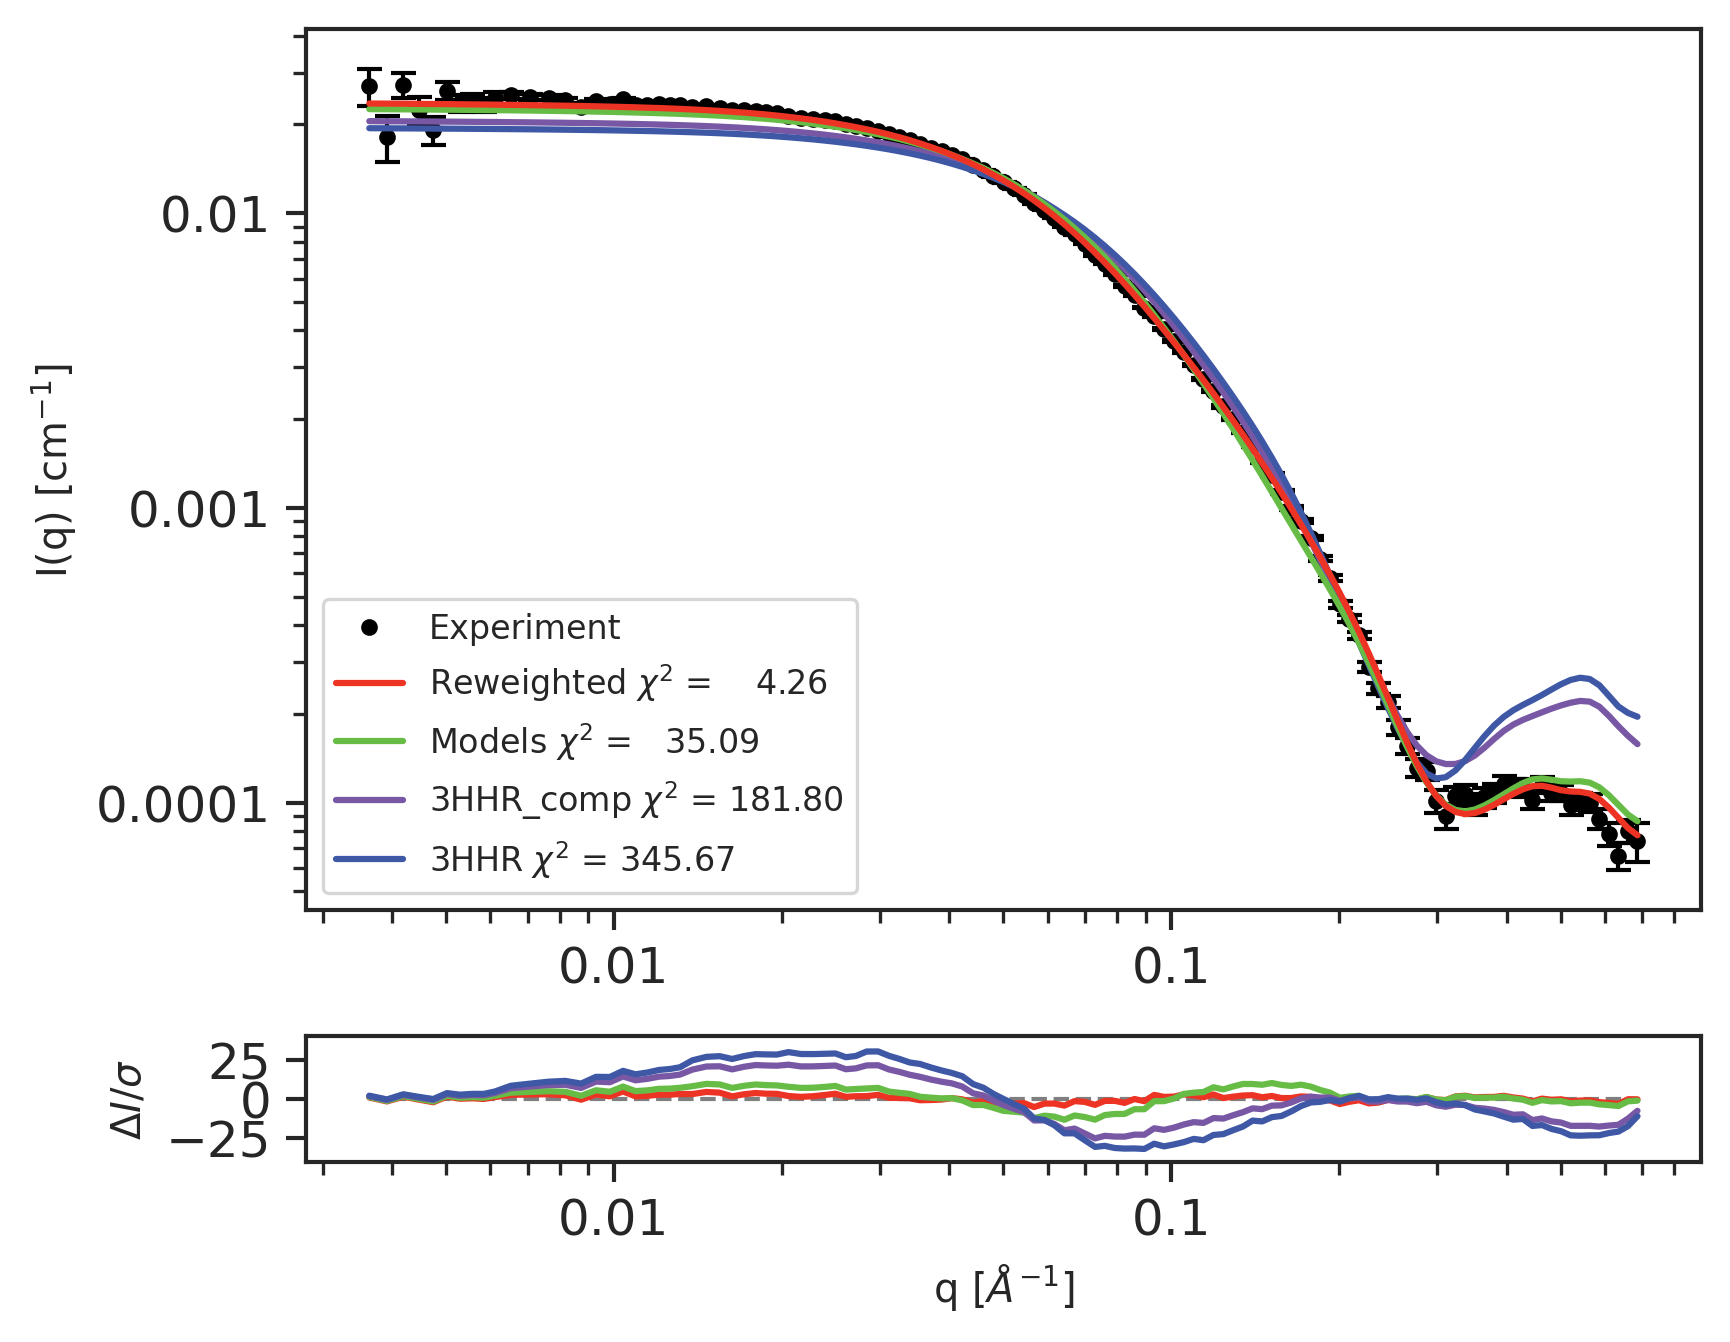

In [38]:
### load SAXS profiles saved by BME
sns.set_style("white")
sns.set_context("paper")
sns.set_style("ticks")
mpl.rcParams['figure.dpi'] =300

sts = np.loadtxt("/home/raul/projects/GHR_FL/GHR_ECDfl/pepsi_fits_5000_3p45_q0d75_dro7d4/example2b1_0_.stats.dat");
pdb1=np.genfromtxt("/home/raul/projects/GHR_FL/GHR_ECDfl/pepsi_fits_5000_3p45_q0d75_dro7d4/3p45_3HHR_C_complete_q0d75avp.dat",skip_footer=1);
pdb2=np.genfromtxt("/home/raul/projects/GHR_FL/GHR_ECDfl/pepsi_fits_5000_3p45_q0d75_dro7d4/3p45_3HHR_C_q0d75avp.dat",skip_footer=1);
#pdb3=np.loadtxt("3p45_GHR_ECDfl_m02_1340.pdb_q05avp.dat");



fig, (ax0, ax1) = plt.subplots( nrows = 2, sharex = False, gridspec_kw = {"height_ratios" : [7,1], "hspace" : 0.25},figsize=(6, 5))

#Experimental
ax0.loglog( sts[:,0],sts[:,1], 'o',alpha=1,label="Experiment", c='black',markersize = 3)

#ax0.fill_between( sts[:,0], sts[:,1] - sts[:,2], 
#                 sts[:,1] + sts[:,2], color = c1, alpha = 0.4, linewidth = 0)

ax0.errorbar (sts[:,0],sts[:,1],yerr=sts[:,2],alpha=1,capsize=3, elinewidth=1, markeredgewidth=1, c='black', lw=1, ls='none')


#Reweigthed
ax0.loglog( sts[:,0],sts[:,4],label="Reweighted $\chi^2$ ={:8.2f}".format(chi2_after),c='#ED3424',linewidth = 1.5, zorder = 5)

#Models
ax0.loglog( sts[:,0],sts[:,3],label="Models $\chi^2$ ={:8.2f}".format(chi2_before),c='#67BC46', linewidth = 1.5, zorder = 4)

#3HHR_C_completed
ax0.loglog( pdb1[:,0],pdb1[:,3],label="3HHR_comp $\chi^2$ = 181.80",c='#7858A4',linewidth = 1.5, zorder = 3)

#3HHR_C
ax0.loglog( pdb2[:,0],pdb2[:,3],label="3HHR $\chi^2$ = 345.67",c='#3E58A6',linewidth = 1.5, zorder = 3)


#Best model
#ax0.loglog( pdb3[:,0],pdb3[:,3],label="BM $\chi^2$ = 2.07",c=c6,linewidth = 1.5, linestyle = '--', zorder = 3)

from matplotlib.ticker import StrMethodFormatter, NullFormatter

ax0.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
ax0.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))

#ax0.set_yticks((1e-1,0))
ax0.set_ylabel( r'I(q) [cm$^{-1}$]' )
ax0.legend( loc = 3,  prop={'size': 8})
ax0.tick_params(axis='both', labelsize=12)

#residual plot

ax1.hlines( 0, min(sts[:,0]), max(sts[:,0]), linestyle = '--', color = 'tab:grey', linewidth = 1 )

ax1.plot( sts[:,0], ( sts[:,1] - sts[:,4] ) / sts[:,2], '#ED3424', linewidth = 1.5, label = 'Reweighted')
ax1.plot( sts[:,0], ( sts[:,1] - sts[:,3] ) / sts[:,2], c='#67BC46', linewidth = 1.5, label = 'Models' )
ax1.plot( sts[:,0], ( pdb1[:,1] - pdb1[:,3] ) / pdb1[:,2],linewidth = 1.5, c='#7858A4', label = '3HHR_comp')
ax1.plot( sts[:,0], ( pdb2[:,1] - pdb2[:,3] ) / pdb2[:,2],linewidth = 1.5, c='#3E58A6', label = '3HHR')
#ax1.plot( sts[:,0], ( pdb3[:,1] - pdb3[:,3] ) / pdb3[:,2],linewidth = 1.5, c=c6, label = 'BM', linestyle = '--')

ax1.set_xscale('log')
ax1.set_ylim((-40,40))
ax1.set_ylabel( r'$\Delta I/\sigma$' )
ax1.set_xlabel( r'q [$\AA^{-1}$]' )
ax1.tick_params(axis='both', labelsize=12)
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))

#ax1.legend(loc = 1, prop={'size': 14})
#ax0.set_ylabel
#ax0.legend()

#plt.tight_layout()
plt.savefig('/home/raul/projects/GHR_FL/GHR_ECDfl/GHR_ECDfl_Saxs_comp_fit_Fig1D_Sept320.pdf', format = 'pdf')
plt.show()